In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
filepath = "../../Data/Genesis_Destatis/Waste Disposal/cleaned_32111-0001_Waste-Disposal-Waste Disposal-years.csv"
df = pd.read_csv(filepath)
print(df.shape)
df.head()

(5, 6)


,Year,Waste disposal facilities,Input from waste disposal facilities (1000t),Waste generated in-house (1000t),Waste delivered from within the country (1000t),Waste delivered from abroad (1000t)
0,2017,14625,417337.7,56730.8,351899.4,8707.5
1,2018,14196,421391.0,54037.8,359142.8,8210.4
2,2019,13876,420258.0,50261.1,362098.7,7898.3
3,2020,13744,417093.4,49541.7,360038.3,7513.4
4,2021,13660,414740.6,50852.9,356110.4,7777.2


In [14]:
df['Year'] = df['Year'].astype('str').astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Year                                             5 non-null      category
 1   Waste disposal facilities                        5 non-null      int64   
 2   Input from waste disposal facilities (1000t)     5 non-null      float64 
 3   Waste generated in-house (1000t)                 5 non-null      float64 
 4   Waste delivered from within the country (1000t)  5 non-null      float64 
 5   Waste delivered from abroad (1000t)              5 non-null      float64 
dtypes: category(1), float64(4), int64(1)
memory usage: 545.0 bytes


## Write function to plot KPI k against years

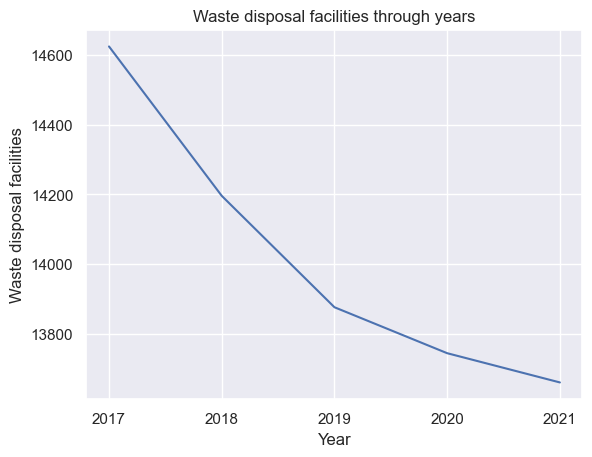

In [17]:
def plot_kpi(df, kpi):
    sns.set_theme()
    sns.lineplot(data=df, x='Year', y=kpi)
    plt.title(f"{kpi} through years")

plot_kpi(df, "Waste disposal facilities")

Number of waste disposal facilities decreases through years

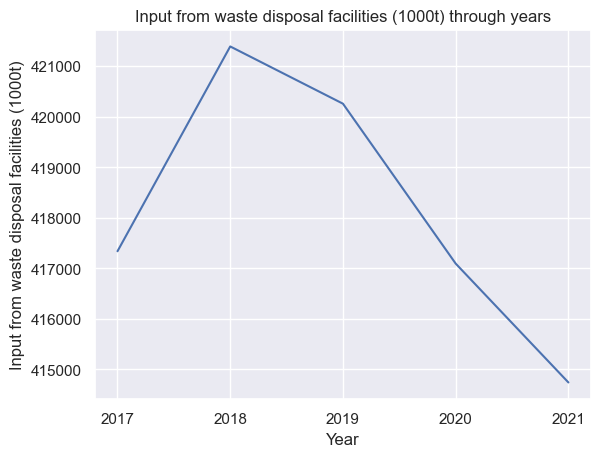

In [18]:
plot_kpi(df, 'Input from waste disposal facilities (1000t)')

Input from waste disposal facilities spiked in 2018, followed by a steep decrease

In [19]:
df.columns


Index(['Year', 'Waste disposal facilities',
       'Input from waste disposal facilities (1000t)',
       'Waste generated in-house (1000t)',
       'Waste delivered from within the country (1000t)',
       'Waste delivered from abroad (1000t)'],
      dtype='object')

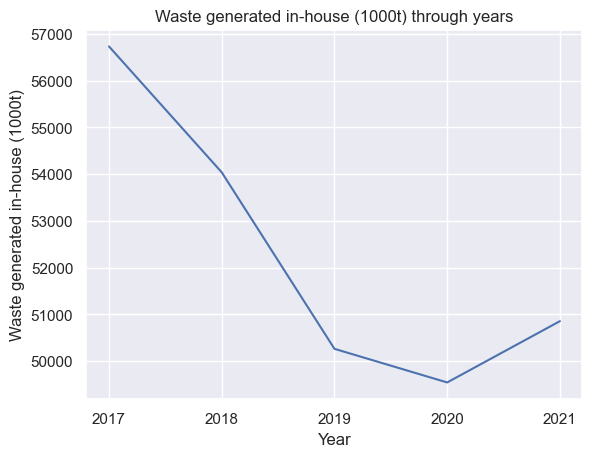

In [20]:
plot_kpi(df, 'Waste generated in-house (1000t)')

Waste generated in-house decreased during 2017 and 2020 before slightly increased in 2021

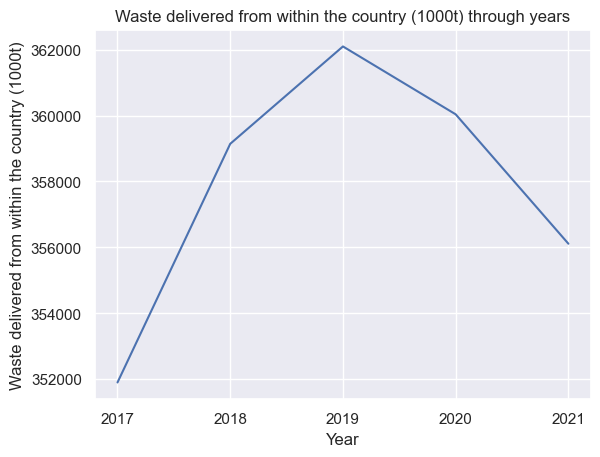

In [21]:
plot_kpi(df, "Waste delivered from within the country (1000t)")

Waste delivered within the country rose during 2017 and 2019 before plummeting from 2019 to 2021

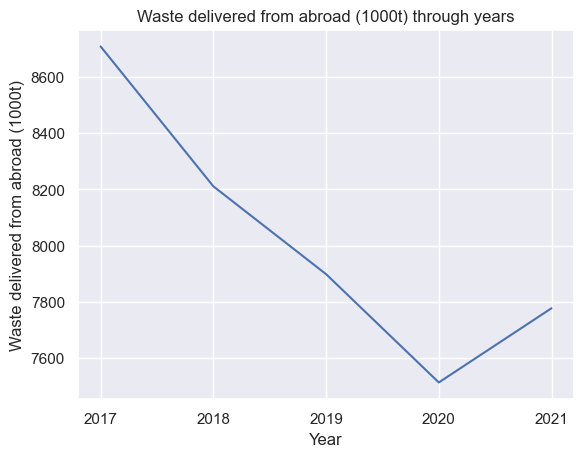

In [23]:
plot_kpi(df, "Waste delivered from abroad (1000t)")

## Explore the correlation between KPIs

In [28]:
df.iloc[:,1:].corr()

,Waste disposal facilities,Input from waste disposal facilities (1000t),Waste generated in-house (1000t),Waste delivered from within the country (1000t),Waste delivered from abroad (1000t)
Waste disposal facilities,1.000000,0.307891,0.956222,-0.632437,0.959627
Input from waste disposal facilities (1000t),0.307891,1.000000,0.173583,0.511300,0.238857
Waste generated in-house (1000t),0.956222,0.173583,1.000000,-0.757202,0.970801
Waste delivered from within the country (1000t),-0.632437,0.511300,-0.757202,1.000000,-0.694531
Waste delivered from abroad (1000t),0.959627,0.238857,0.970801,-0.694531,1.000000


### Comments:
- Waste generated in house and waste delivered from abroad strongly correlate with each other (0.97), both decreased between 2017 and 2020 followed by small increases a year later
- The above 2 also strongly correlate with number of waste disposal facilities, as the later also decreased through years
- The decrease in waste delivered from abroad to a certain extent associate with the increase in waste delivered from within the country (-0.69)
- And as number of waste disposal facilities decreased, waste delivered from within the country considerably increased (-0.63)

In [30]:
df

,Year,Waste disposal facilities,Input from waste disposal facilities (1000t),Waste generated in-house (1000t),Waste delivered from within the country (1000t),Waste delivered from abroad (1000t)
0,2017,14625,417337.7,56730.8,351899.4,8707.5
1,2018,14196,421391.0,54037.8,359142.8,8210.4
2,2019,13876,420258.0,50261.1,362098.7,7898.3
3,2020,13744,417093.4,49541.7,360038.3,7513.4
4,2021,13660,414740.6,50852.9,356110.4,7777.2


c:\Users\User\Desktop\ML_DL_SL\Projects\Germany-Waste-Management-Analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


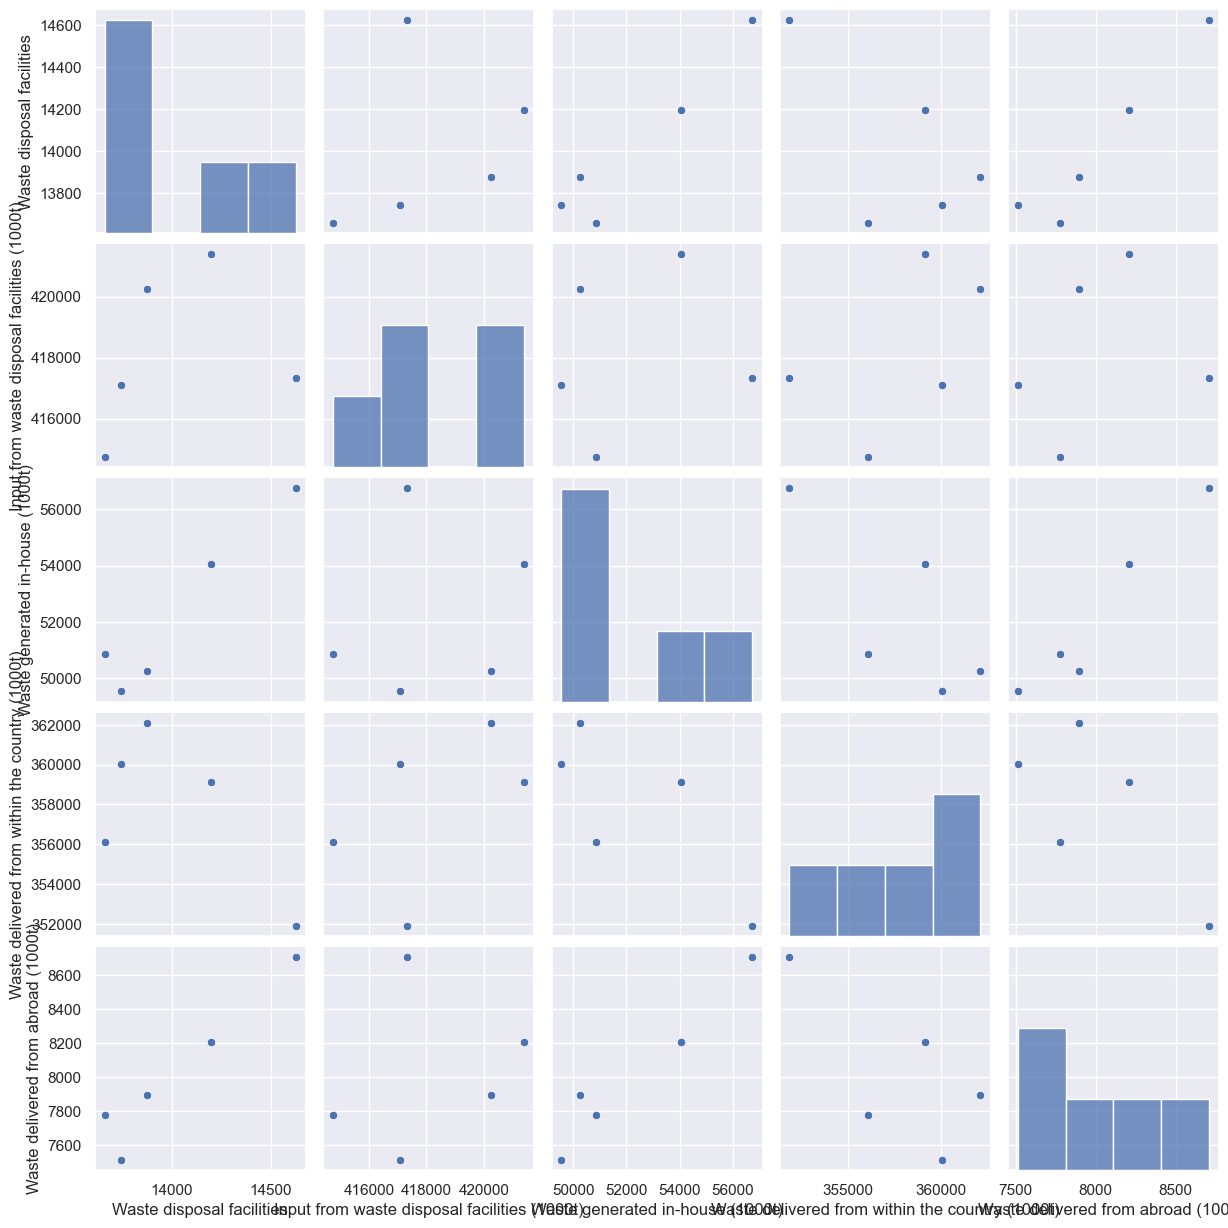

In [29]:
sns.pairplot(df.iloc[:,1:])